# Assignment 3

This assignment has one main part:

**PCA** : In this part the goal is to implement the dimensionality reduction technique *Principal Component Analysis (PCA)* to a very high dimensional data and apply visualization. Note that you are not allowed to use the built-in PCA API provided by the sklearn library. Instead you will be implementing from the scratch. Use the data in data/train.csv for generating the PCA. See the detailed intructions below.
    

For this task we use the  MovieLens dataset. The data is in train.csv.
   

In [1]:
import numpy as np
import pandas as pd
from scipy.linalg import sqrtm

# Part-1a: Convert data to user-movie rating matrix (10 points)
    - Read the train.csv file and movies.dat file and use user_id and movie_id to create user-movie rating matrix


In [ ]:
def readMovieRatingData():
    # TODO Read the user-movie rating in data/train.csv and convert it to a user-movie rating matrix (users in the rows and movies in the colums)
    # Mind the header row in the train.csv


In [3]:
movie_ratings = readMovieRatingData()

movie_ratings.shape

(6040, 3952)

movie_ratings should have the shape 6040 (users) x 3952 (movies)

In [ ]:
def readMovieData():
    # Read the movie data from data/movies.dat


In [5]:
movie_data = readMovieData()

In [6]:
movie_data.shape

(3883, 3)

`movie_data` should have the shape 3883x3

## We are going to compute PCA for movies so transpose the matrix using X=readMovieRatingData().T


# Part-1b: Preprocessing  (10 points)
Before implementing PCA you are required to perform some preprocessing steps:
1. Mean normalization: Replace each feature/attribute, $x_{ji}$ with $x_j - \mu_j$, In other words, determine the mean of each feature set, and then for each feature subtract the mean from the value, so we re-scale the mean to be 0 
2. Feature scaling: If features have very different scales then scale make them comparable by altering the scale, so they all have a comparable range of values e.g. $x_{ji}$ is set to $(x_j - \mu_j) / s_j$  Where $s_j$ is some measure of the range, so could be  $\max(x_j) - \min(x_j)$ or Standard deviation $stddev(x_j)$.

In [ ]:
def normScale(X):
    # Normalize the data to have zero mean and unit variance
    # Return the normalized data and the mean and standard deviation used for normalization
    # Hint: You can use the np.mean and np.std functions

    return X_norm
X = movie_ratings
X = normScale(X)

# Part-2: Covariance matrix  (15 points)
Now the preprocessing is finished. Next, as explained in the lecture, you need to compute the covariance matrix https://en.wikipedia.org/wiki/Covariance_matrix. Given $n \times m$ $n$ rows and $m$ columns matrix, a covariance matrix is an $m \times m$ matrix given as below (sigma)
$\Sigma = \frac{1}{m}\sum{\left(x^{i}\right)\times \left(x^{i}\right)^{T}}$
You may use the "numpy.cov" function in numpy library 

In [8]:
# Compute X to covariance matrix cov_matrix.
cov_matrix = np.cov(X)

# The cov_matrix should have shape 6040x6040

In [9]:
cov_matrix.shape

(6040, 6040)

# Instructions for part 3, 4, and 5
- getSVD() function is expected to return 3 values. For example: ```U, S, V = getSVD(cov_matrix)```
- You can follow the skeleton below to have an idea on how the autograder's test calls your functions:
```
U, S, V = getSVD(cov_matrix)
z = getKComponents(U, X, k)
ratio = getVarianceRatio(z, U, X, k)
```
- Using the built-in PCA implementation in sklearn, the approximate X matrix can be obtained by function ```inverse_transform```

# Part-3: SVD computation  (10 points)
Now compute the SVD on the covariance matrix $SVD(\Sigma)$. You may use the svd implementation in numpy.linalg.svd

In [ ]:
def getSVD(cov_matrix):
    #TODO user np.linalg.svd here


In [11]:
U, S, V = getSVD(cov_matrix)

In [12]:
U.shape, S.shape, V.shape

((6040, 6040), (6040,), (6040, 6040))

# Part-4: Compute PCA matrix (K dimensional)  (10 points)
Now select the first $k$ columns from the matrix $U$ and multiply with $X$ to get $k$ dimensional representation.

In [ ]:
def getKComponents(U, X, K):
    # implement matrix multiplication of first k columns of U * X


In [19]:
z = getKComponents(U, X, 2)

(6040, 2)


# Part-5: Compute Reconstruction Error  (10 points)
Implement a function to compute the variance ratio (from reconstruction error)

In [ ]:
def getVarianceRatio(Z, U, X, K):
    # Implement computation of reconstruction error



In [21]:
ratio = getVarianceRatio(z, U, X, 2)

In [22]:
ratio

np.float64(1.3086305277002634)

# Compare the variance ration to the built-in PCA implementation in sklearn https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html (5 points)

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
z_pca = pca.fit_transform(X)


In [ ]:
X_approx_pca = pca.inverse_transform(z_pca)

# TODO: Compute the reconstruction error

reconstruction_error

np.float64(1.2858369959181828)

# Part-6: Scatter plot 2-dimensional PCA  (10 points)
Using matplotlib plot the 2-dimensional scatter plot of the first 2 compoenents with y (movie genre from movies.dat file) as labels. Remember you are plotting movies in dimensions so you can label them with movie generes.

In [ ]:
import matplotlib.pyplot as plt

def plotFunction(PC, movie_data):



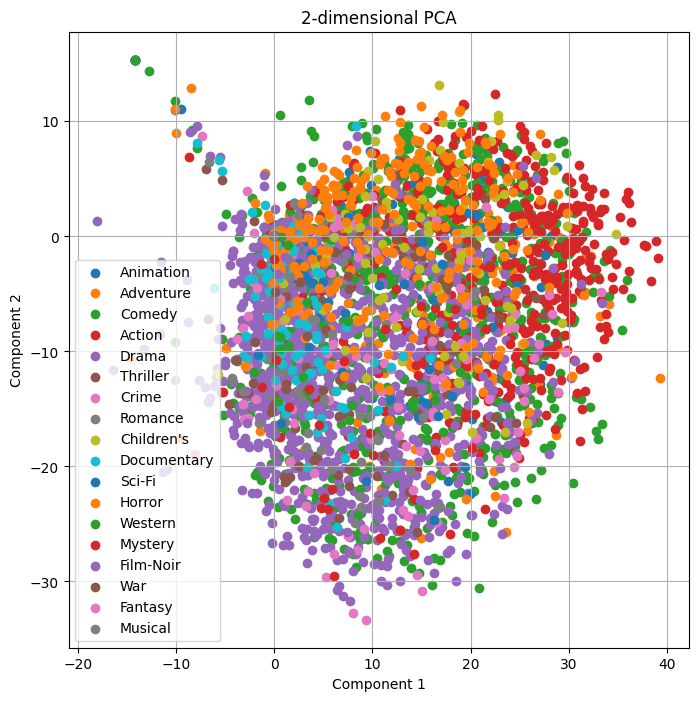

In [ ]:
#Expected plot
plotFunction(z, movie_data)

# Part-7 Find best $K$  (10 points)
Find the minimum value of $K$ with which the ratio between averaged squared projection error with total variation in data is less than 1% in other words we retain 90% of the variance. You can achieve this by repeating getKComponents with $K=1$ until the variance ratio is <= 1%.

In [ ]:
def findBestK(initial, step, U, X):
    K_min = initial
    ratio = 1
    # TODO: Implement the loop to find the best K until the ratio is less than 0.1
    return K_min

In [ ]:
k_best = findBestK(1, 10, U, X)

(6040, 12)
1.1751999227396936
(6040, 22)
1.123993985765154
(6040, 32)
1.0871006840158552
(6040, 42)
1.0566641131751537
(6040, 52)
1.0297223283043684
(6040, 62)
1.0052723030277078
(6040, 72)
0.9824837478354975
(6040, 82)
0.9612493497040064
(6040, 92)
0.9413162807849076
(6040, 102)
0.9225395915323834
(6040, 112)
0.9047090637769224
(6040, 122)
0.8876678886525633
(6040, 132)
0.8712757056871083
(6040, 142)
0.8555953720823211
(6040, 152)
0.8405538678737795
(6040, 162)
0.8260422527649851
(6040, 172)
0.8120074153728378
(6040, 182)
0.7984236218626845
(6040, 192)
0.7852729385341042
(6040, 202)
0.7725405665022052
(6040, 212)
0.7601538269121351
(6040, 222)
0.7481008465585084
(6040, 232)
0.7363621116692456
(6040, 242)
0.7249177124052464
(6040, 252)
0.7137890782305567
(6040, 262)
0.7029127059322432
(6040, 272)
0.6923028160086863
(6040, 282)
0.681947064970906
(6040, 292)
0.6718339127578895
(6040, 302)
0.6619408676538365
(6040, 312)
0.6522469601189296
(6040, 322)
0.6427561334863034
(6040, 332)
0.63347

1702

# Part-8: TSNE visualization (10 points)
Finally, having found an optimal $K$ use these components as an input data to another dimensionality reduction method called tSNE (https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) and reduce it to 2 dimensions.

In [ ]:
from sklearn.manifold import TSNE
tsne_pca_results = None

Finally, scatter plot the components given by the tSNE using matplotlib compare it to the earlier scatter plot.

In [ ]:
# Scatter plot the 2-dimensional tsne compoents with target as labels
plotFunction(tsne_pca_results, movie_data)